In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy . optimize import leastsq
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# read sheets
# 0-stock return, 1-all issuers, 2-first-issued, 3-subsequent
CGB = pd.read_excel('/workspaces/Dissertation1/Haiyan - Chinese Corporate Bond Data.xlsx', sheet_name=[0,1,2,3])


In [3]:
# event window
ewl=-5
ewr=5

def error(params, x, y):
    a, b = params
    return y - (a * x + b)


In [4]:
Total_CAR1 = []
for i in range(len(CGB[1]['Code'])):
    row_num_x = list(CGB[0]['Code']).index(CGB[1]['Start Date'][i])
    x = CGB[0]['CHSASHR'][row_num_x - 220: row_num_x - 19]
    y = CGB[0][CGB[1]['Code'][i]][row_num_x - 220: row_num_x - 19]
    p0 = [0, 1]
    Para = leastsq(error, p0, args=(x, y))
    a, b = Para[0]
    # print(a,b)


    CAR1=0
    for j in range(ewr - ewl + 1):
        # the abnormal daily return 
        AR1 = CGB[0][CGB[1]['Code'][i]][row_num_x + ewl + j] - (b + a * CGB[0]['CHSASHR'][row_num_x + ewl + j])
        # the cumulative abnormal return
        CAR1 += AR1
    Total_CAR1.append(CAR1)
print(Total_CAR1)



[np.float64(-0.1151399114160907), np.float64(0.33581504832463427), np.float64(4.893133789972779), np.float64(-9.695735764127523), np.float64(0.13618025556263058), np.float64(1.8530552942948397), np.float64(8.782351488651837), np.float64(-1.1754694549059477), np.float64(2.378693475354022), np.float64(-1.302602663295496), np.float64(-8.685503031657143), np.float64(1.1243611875457107), np.float64(-7.889633954607096), np.float64(4.830547595702296), np.float64(25.250004961300156), np.float64(-13.13070612177424), np.float64(7.240207780025268), np.float64(-4.5181405599959055), np.float64(-3.8793200932616654), np.float64(2.1741224450872982), np.float64(0.24851916369605598), np.float64(-3.7791690590237543), np.float64(-1.4981779425626438), np.float64(-6.928141719607033), np.float64(3.2482295263423153), np.float64(-3.5117933148721345), np.float64(-9.94808186711421), np.float64(0.7565662080359608), np.float64(18.810443762018867), np.float64(0.7594427534965292), np.float64(4.104262937704985), np.f

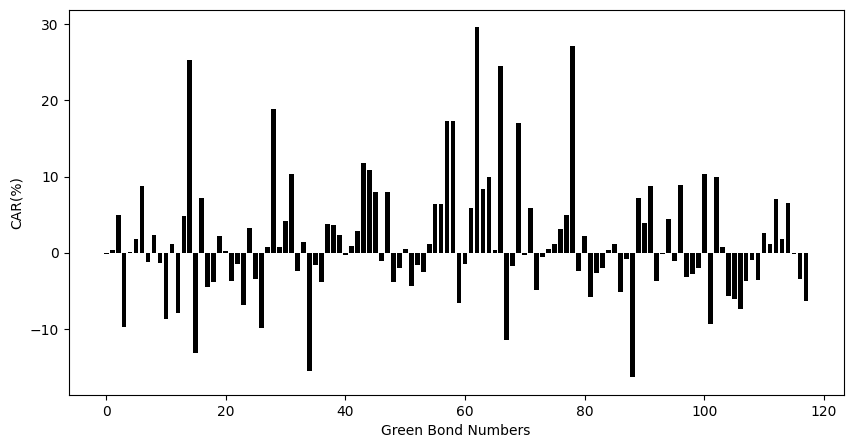

In [5]:
Company_numbers=range(len(CGB[1]['Code']))
plt.figure(figsize=(10, 5))
plt.bar(Company_numbers, Total_CAR1, color='black')

plt.xlabel('Green Bond Numbers')
plt.ylabel('CAR(%)')

plt.show()


In [6]:
CAAR1 = np.mean(Total_CAR1)
print(CAAR1)
# T-test
t_statistic, p_value = stats.ttest_1samp(Total_CAR1, 0)

print(f"T-statistic: {t_statistic}, P-value: {p_value}")

1.505674872524326
T-statistic: 2.06994181844691, P-value: 0.04065881848548986


<h1>Robustness Tests<h1>

In [29]:
#  change event window
ewl=-3
ewr=5

# ewl=-1
# ewr=5

# ewl=-1
# ewr=2

Total_CAR1 = []
for i in range(len(CGB[1]['Code'])):
    row_num_x = list(CGB[0]['Code']).index(CGB[1]['Start Date'][i])
    x = CGB[0]['CHSASHR'][row_num_x - 220: row_num_x - 19]
    y = CGB[0][CGB[1]['Code'][i]][row_num_x - 220: row_num_x - 19]
    p0 = [0, 1]
    Para = leastsq(error, p0, args=(x, y))
    a, b = Para[0]
    # print(a,b)


    CAR1=0
    for j in range(ewr - ewl + 1):
        # the abnormal daily return 
        AR1 = CGB[0][CGB[1]['Code'][i]][row_num_x + ewl + j] - (b + a * CGB[0]['CHSASHR'][row_num_x + ewl + j])
        # the cumulative abnormal return
        CAR1 += AR1
    Total_CAR1.append(CAR1)
print(Total_CAR1)

CAAR1 = np.mean(Total_CAR1)
print(CAAR1)
# T-test
t_statistic, p_value = stats.ttest_1samp(Total_CAR1, 0)

print(f"T-statistic: {t_statistic}, P-value: {p_value}")


[np.float64(2.588359575444714), np.float64(1.8917287334532022), np.float64(3.0116804544231774), np.float64(-11.02840090918164), np.float64(2.0384229648956533), np.float64(-0.1313577159905721), np.float64(9.790864561517173), np.float64(-0.3887287851360183), np.float64(0.6150627738362686), np.float64(-0.3829609481997205), np.float64(-0.32439086668811246), np.float64(-0.4332022226421929), np.float64(-1.2546755877524545), np.float64(8.960377117786956), np.float64(20.599231920457427), np.float64(-12.701932364535192), np.float64(7.384318819871524), np.float64(-3.2848107085001668), np.float64(-0.840071242203162), np.float64(-3.5113194710687465), np.float64(0.8254432478014941), np.float64(1.503413232916544), np.float64(-0.3406374200224395), np.float64(-3.7084291747565112), np.float64(-3.0952578198396887), np.float64(-0.1513379072423966), np.float64(-6.3169041167280975), np.float64(2.3784264973932463), np.float64(14.095929385282112), np.float64(0.36827428890675873), np.float64(5.134002610669724

<h1>Heterogeneity Tests<h1>

In [14]:
# event window
ewl=-5
ewr=5

Total_CAR2 = []

# first issued
for i in range(len(CGB[2]['Code'])):
    row_num_x = list(CGB[0]['Code']).index(CGB[2]['Start Date'][i])
    x = CGB[0]['CHSASHR'][row_num_x - 220: row_num_x - 19]
    y = CGB[0][CGB[2]['Code'][i]][row_num_x - 220: row_num_x - 19]
    p0 = [0, 1]
    Para = leastsq(error, p0, args=(x, y))
    a, b = Para[0]
    # print(a,b)

   
    CAR2=0
    for j in range(ewr - ewl + 1):
        # the abnormal daily return 
        AR2 = CGB[0][CGB[2]['Code'][i]][row_num_x + ewl + j] - (b + a * CGB[0]['CHSASHR'][row_num_x + ewl + j])
        # the cumulative abnormal return
        CAR2 += AR2
    Total_CAR2.append(CAR2)
print(Total_CAR2)

CAAR2 = np.mean(Total_CAR2)
print(CAAR2)
# T-test
t_statistic, p_value = stats.ttest_1samp(Total_CAR2, 0)

print(f"T-statistic: {t_statistic}, P-value: {p_value}")

[np.float64(-0.1151399114160907), np.float64(0.33581504832463427), np.float64(4.893133789972779), np.float64(0.13618025556263058), np.float64(1.8530552942948397), np.float64(8.782351488651837), np.float64(-1.1754694549059477), np.float64(-1.302602663295496), np.float64(-8.685503031657143), np.float64(1.1243611875457107), np.float64(-7.889633954607096), np.float64(25.250004961300156), np.float64(-13.13070612177424), np.float64(7.240207780025268), np.float64(-3.8793200932616654), np.float64(-6.928141719607033), np.float64(3.2482295263423153), np.float64(-9.94808186711421), np.float64(18.810443762018867), np.float64(0.7594427534965292), np.float64(4.104262937704985), np.float64(10.32449392746595), np.float64(-15.600521654268398), np.float64(-3.847762444915147), np.float64(3.682033796737404), np.float64(2.342241265380057), np.float64(-0.3482237659414029), np.float64(2.8260524169345875), np.float64(11.730484082118293), np.float64(10.815720051301161), np.float64(-3.8049980973168123), np.floa

In [28]:
# event window
ewl=-5
ewr=5

Total_CAR3 = []

# subsequent
for i in range(len(CGB[3]['Code'])):
    row_num_x = list(CGB[0]['Code']).index(CGB[3]['Start Date'][i])
    x = CGB[0]['CHSASHR'][row_num_x - 220: row_num_x - 19]
    y = CGB[0][CGB[3]['Code'][i]][row_num_x - 220: row_num_x - 19]
    p0 = [0, 1]
    Para = leastsq(error, p0, args=(x, y))
    a, b = Para[0]
    # print(a,b)

   
    CAR3=0
    for j in range(ewr - ewl + 1):
        # the abnormal daily return 
        AR3 = CGB[0][CGB[3]['Code'][i]][row_num_x + ewl + j] - (b + a * CGB[0]['CHSASHR'][row_num_x + ewl + j])
        # the cumulative abnormal return
        CAR3 += AR3
    Total_CAR3.append(CAR3)
print(Total_CAR3)

# # draw
# Company_numbers=range(len(CGB[3]['Code']))
# plt.figure(figsize=(10, 5))
# plt.bar(Company_numbers, Total_CAR3, color='black')

# plt.xlabel('Company Numbers')
# plt.ylabel('CAR')

# plt.show()



CAAR3 = np.mean(Total_CAR3)
print(CAAR3)
# T-test
t_statistic, p_value = stats.ttest_1samp(Total_CAR3, 0)

print(f"T-statistic: {t_statistic}, P-value: {p_value}")

[np.float64(-9.695735764127523), np.float64(2.378693475354022), np.float64(4.830547595702296), np.float64(-4.5181405599959055), np.float64(2.1741224450872982), np.float64(0.24851916369605598), np.float64(-3.7791690590237543), np.float64(-1.4981779425626438), np.float64(-3.5117933148721345), np.float64(0.7565662080359608), np.float64(-2.3488178259232946), np.float64(1.4389434163746055), np.float64(-1.575118012701969), np.float64(3.7782987563146038), np.float64(0.8616882654863722), np.float64(7.993716000333809), np.float64(-1.0660266877168756), np.float64(7.993716000333809), np.float64(0.456818059086749), np.float64(-1.592467284147145), np.float64(6.353333308199694), np.float64(6.353333308199694), np.float64(17.274334458347717), np.float64(17.274334458347717), np.float64(-1.4854999416687518), np.float64(5.9128090551597925), np.float64(-11.422040204258543), np.float64(16.974635870886395), np.float64(-0.3503412559743814), np.float64(-4.916451371265189), np.float64(-0.5122247591392515), np.